In [ ]:
"""
Random Forest is a learning method that operates by constructing multiple decision trees. 
The final decision is made based on the majority of the trees and is chosen by the random forest.
It works in four steps:
1. Select random samples from a given dataset
2. Construct a decision tree for each sample and get a prediction result from each decision tree
3. Perform a vote for each predicted result
4. Select the prediction result with the most votes as the final prediction
"""

In [ ]:
"""

1st Goal: Getting a generalized prediction as fast as possible. You shouldn't be spending a lot of time
trying to tune your model, add features, etc until you have actually gotten at least one prediction. 
The reason for this is you can allocate your time more effectively, because sometimes 
some efforts you put in has a very little effect on how well your final model is at predicting 
new observations where some very easy changes actually have a lot of effect.

"""

In [58]:
# 1st import module Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# The error metric module. C-stat (in statistics) (aka ROC/AUC) 
from sklearn.metrics import roc_auc_score

# Data structure
import pandas as pd

# Importing the data
X = pd.read_csv('/Users/vikshah/Machine_Learning/data/titanic/train.csv')

# Popping off the variable of people who survived as why
Y = X.pop("Survived")

In [3]:
# Describe method only shows the numberic variable. 
#There are categorical variables in the data set but we're going to skip for the moment

X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# scikit-learn will not run if any missing values 
#So If age has any missing values and if we were to run any estimator it'll not run
# Impute Age with mean

X["Age"].fillna(X.Age.mean(), inplace=True)

# Describe data again to make sure that Age has correct values
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# To build a fast model as fast as possible is to start ignoring all of the categorical variables

numeric_variables = list(X.dtypes[X.dtypes != "object"].index)

X[numeric_variables].head()

"""
PassengerID looks like a not useful variable. Leave it -- interested in seeing if it is useful
for prediction. It might be useful if the PassengerID was assigned in some non-randon way. I.e. perhaps 
PassengerID was assigned based on when the ticket was purchased in whcih case there might be something
predictive about people who purchased their tickets early or late.

"""

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [9]:
"""
# Building a first model.
# Did a few things: 
1. n_estimators =100 (default=100, build model on a small dataset), 

2. oob_score=True(Now you want to train the whole dataset and not split the Validation set. 
When you apply oob_score=True, In Random Forest, let's say for “i” TREE, IT CREATES 
A Validation Set of NUMBER OF ROWS (which are not used for training set of 'i'th tree)
.... Every rows gonna reappear in that if you train on ample number of trees.)

3. Random_state can be 0 or 1 or any other integer. I wonder 42 have anything to do with:

https://softwareengineering.stackexchange.com/questions/507/why-42-is-the-preferred-number-when-indicating-something-random
https://www.independent.co.uk/life-style/history/42-the-answer-to-life-the-universe-and-everything-2205734.html

# Out of Bag(OOB)
# https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710
# https://stackoverflow.com/questions/42191717/scikit-learn-random-state-in-splitting-dataset/42197534#42197534

"""

model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# When I fit the data - only selecting the numeric variables because we have yet to dummy out the
# categorical variables. 
# So it's training a model just on the numberic variables ignoring all the categorical variables

model.fit(X[numeric_variables], Y)

RandomForestRegressor(oob_score=True, random_state=42)

In [7]:
"""
# When the model is trained we can access it's attributes with trailing underscore.
It's available only after we've run a fit method.
# What it produces is because this is a (random forest regressor) R-squared values (R^2)

"""

model.oob_score_

0.1361695005913669

In [10]:
"""
# The c-stat (also known as the concordance statistic is equal to the AUC (Area Under Curve)) 
has following interpretations:
# A value below 0.5 indicates a poor model, the closer the value is to 1, 
the better the model is at correctly classifying outcomes
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2984249/
#https://www.statology.org/how-to-interpret-the-c-statistic-of-a-logistic-regression-model/
"""
# Not the best benchmark but it's pretty good and respectable benchmark

y_oob = model.oob_prediction_
c_stat = roc_auc_score(Y, y_oob)
print(f'c-stat: {c_stat}')

c-stat: 0.7399551550399983


In [61]:
"""
# y_oob (y out of bag) is just an array where every single observation has a prediction
the probability of survival. Following are out-of-bag predictions
# To see what y_oob looks like just uncomment and run y_oob

"""

#y_oob

array([0.71111111, 0.72413793, 0.02325581, 0.47368421, 0.16666667,
       0.34146341, 0.64705882, 0.17647059, 0.52777778, 0.75609756,
       0.72222222, 0.29411765, 0.38709677, 0.625     , 0.87096774,
       0.46875   , 0.04444444, 0.78571429, 0.41304348, 0.24242424,
       0.88571429, 0.64102564, 0.35897436, 0.5       , 0.27777778,
       0.05128205, 0.88636364, 0.71428571, 0.46875   , 0.36842105,
       0.47368421, 0.23684211, 0.84090909, 0.67647059, 0.82051282,
       0.475     , 0.33333333, 0.225     , 0.18421053, 0.53191489,
       0.275     , 0.57777778, 0.11904762, 0.90625   , 0.36363636,
       0.0625    , 0.61764706, 0.62162162, 0.44186047, 0.16129032,
       0.25      , 0.70833333, 0.25      , 0.61290323, 0.36363636,
       0.4       , 0.66666667, 0.5       , 1.        , 0.13157895,
       0.33333333, 0.2       , 0.76923077, 0.21428571, 0.5       ,
       0.25      , 0.36842105, 0.33333333, 0.4516129 , 0.10526316,
       0.88888889, 0.13157895, 0.51351351, 0.23076923, 0.34146

In [13]:
"""
# We have a benchmark now we can make some improvements
# Following function is to see descriptive stats on the categorical variables
# What are the differences between numerical and categorical data? Both can take values
like id number, postal code, phone number, etc. The only difference is that arithmetic operations
can not be performed on the values taken by categorical data.

"""

def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [14]:
# Does the descriptive statistics on just the categorical variables

describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Perkin, Mr. John Henry",male,1601,B96 B98,S
freq,1,577,7,4,644


In [15]:
"""
# There are some of the variable that we don't want to deal beacuse there's nothing unique in it.
So we can drop them 

"""

X.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [17]:
"""
# Change the Cabin variable to be only the first letter or None

"""
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
X["Cabin"] = X.Cabin.apply(clean_cabin)

In [62]:
# Remove comment before and run

X.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [21]:
"""
# Loop which goes through the following three categorical variable 
"""
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    # Concat the original data frame with these dummy variables and then drop the original variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [57]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [25]:
"""
# Look at all the columns in the dataset
# Sometimes you it might happen that jupyter notebook might hide some columns,
it'll compress it to make it smaller and that could be problematic.
Below simple function will ensure that ther's no compression in the columns
and it shows them all

"""


def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))

printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [36]:
"""
# Since we have the data set we can now build the model
# 0.86 is very good
"""
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, Y)
p_model = roc_auc_score(Y, model.oob_prediction_)
print(f'C-stat: {p_model}')

C-stat: 0.8635211282608464


In [37]:
"""
# We have a good model, so now let's look at Variable importance measures
meaning calculate which variables are important in the model. So by accessing
this features importance attribute of the model we could print out which variables
are important numerically.

"""
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

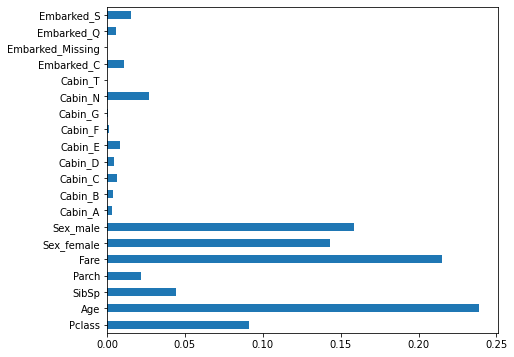

In [42]:
# above numbers are not very useful/hard to read
# Simple version that shows all of the variables (Bar Chart)
# Age is the most important, second fare, etc. when viewed in isolation

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_index()
feature_importances.plot(kind="barh", figsize=(7,6));

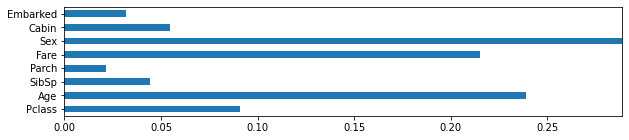

In [56]:
# In above example Embarked three different bars. We want to see aggregrate view
# Use function written by Mike Bernico

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
        
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)
            
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    #results.sort_index(axis=1)
    results.sort_index()
    results.plot(kind='barh', figsize=(width, len(results)/4), xlim=(0,x_scale))

graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)